# Evaluation

In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
folder_path = '../data/analysis/'

results = {}

def perform_calculations(sample_intervals, average_rewards):
    sample_intervals = np.array(sample_intervals)
    average_rewards = np.array(average_rewards)

    window_size = 10
    moving_avg = np.convolve(average_rewards, np.ones(window_size) / window_size, mode='valid')

    rate_of_change = np.diff(moving_avg)
    stability = np.std(moving_avg)
    variability = np.max(moving_avg) - np.min(moving_avg)

    coefficients = np.polyfit(sample_intervals[:len(moving_avg)], moving_avg, 1)
    line = np.poly1d(coefficients)

    line_values = line(sample_intervals[:len(moving_avg)])
    
    return {
        'sample_intervals': sample_intervals,
        'average_rewards': average_rewards,
        'moving_avg': moving_avg.tolist(),
        'rate_of_change': rate_of_change.tolist(),
        'stability': stability,
        'variability': variability,
        'line_values': line_values.tolist()
    }

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        sample_intervals = data['sample_intervals']
        average_rewards = data['average_rewards']
        
        results[filename] = perform_calculations(sample_intervals, average_rewards)

[]

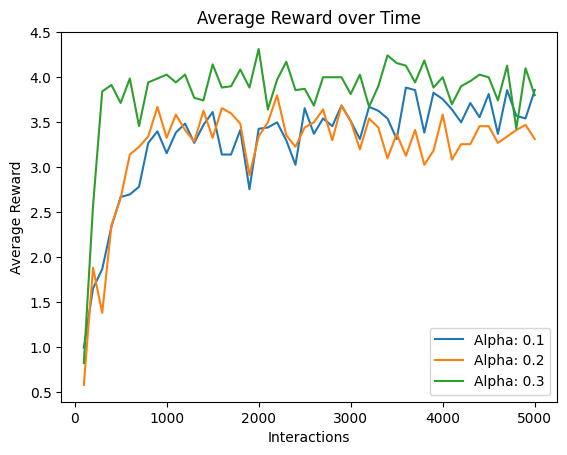

In [3]:
plt.plot(results['result_0.1_0.1.json']['sample_intervals'], results['result_0.1_0.1.json']['average_rewards'], label='Alpha: 0.1')
plt.plot(results['result_0.2_0.1.json']['sample_intervals'], results['result_0.2_0.1.json']['average_rewards'], label='Alpha: 0.2')
plt.plot(results['result_0.3_0.1.json']['sample_intervals'], results['result_0.3_0.1.json']['average_rewards'], label='Alpha: 0.3')

plt.xlabel('Interactions')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.legend()
plt.plot()

[]

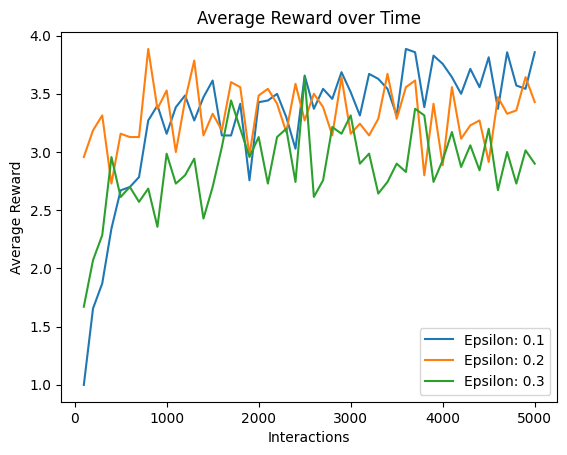

In [4]:
plt.plot(results['result_0.1_0.1.json']['sample_intervals'], results['result_0.1_0.1.json']['average_rewards'], label='Epsilon: 0.1')
plt.plot(results['result_0.1_0.2.json']['sample_intervals'], results['result_0.1_0.2.json']['average_rewards'], label='Epsilon: 0.2')
plt.plot(results['result_0.1_0.3.json']['sample_intervals'], results['result_0.1_0.3.json']['average_rewards'], label='Epsilon: 0.3')

plt.xlabel('Interactions')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.legend()
plt.plot()

[]

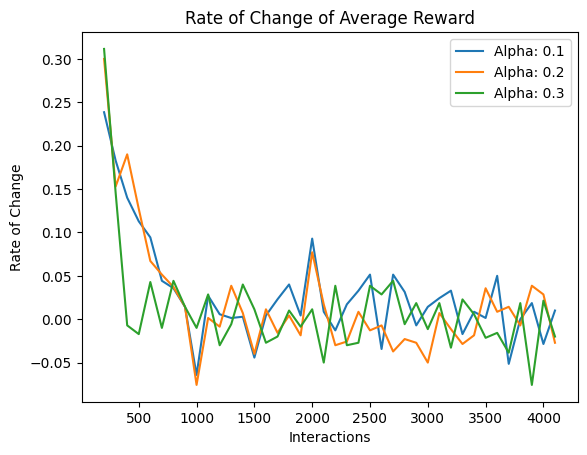

In [5]:
plt.plot(sample_intervals[1:len(results['result_0.1_0.1.json']['moving_avg'])], results['result_0.1_0.1.json']['rate_of_change'], label='Alpha: 0.1')
plt.plot(sample_intervals[1:len(results['result_0.2_0.1.json']['moving_avg'])], results['result_0.2_0.1.json']['rate_of_change'], label='Alpha: 0.2')
plt.plot(sample_intervals[1:len(results['result_0.3_0.1.json']['moving_avg'])], results['result_0.3_0.1.json']['rate_of_change'], label='Alpha: 0.3')

plt.xlabel('Interactions')
plt.ylabel('Rate of Change')
plt.title('Rate of Change of Average Reward')
plt.legend()
plt.plot()

[]

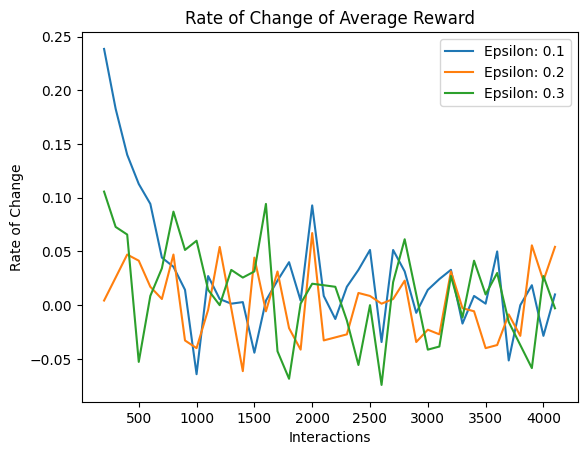

In [6]:
plt.plot(sample_intervals[1:len(results['result_0.1_0.1.json']['moving_avg'])], results['result_0.1_0.1.json']['rate_of_change'], label='Epsilon: 0.1')
plt.plot(sample_intervals[1:len(results['result_0.1_0.2.json']['moving_avg'])], results['result_0.1_0.2.json']['rate_of_change'], label='Epsilon: 0.2')
plt.plot(sample_intervals[1:len(results['result_0.1_0.3.json']['moving_avg'])], results['result_0.1_0.3.json']['rate_of_change'], label='Epsilon: 0.3')

plt.xlabel('Interactions')
plt.ylabel('Rate of Change')
plt.title('Rate of Change of Average Reward')
plt.legend()
plt.plot()

[]

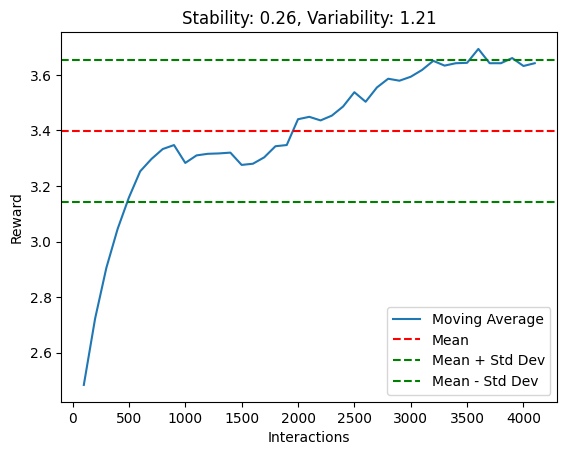

In [7]:
moving_avg = results['result_0.1_0.1.json']['moving_avg']
stability = results['result_0.1_0.1.json']['stability']
variability = results['result_0.1_0.1.json']['variability']

plt.plot(sample_intervals[:len(results['result_0.1_0.1.json']['moving_avg'])], moving_avg, label='Moving Average')
plt.axhline(y=np.mean(moving_avg), color='r', linestyle='--', label='Mean')
plt.axhline(y=np.mean(moving_avg) + stability, color='g', linestyle='--', label='Mean + Std Dev')
plt.axhline(y=np.mean(moving_avg) - stability, color='g', linestyle='--', label='Mean - Std Dev')
plt.xlabel('Interactions')
plt.ylabel('Reward')
plt.title(f'Stability: {stability:.2f}, Variability: {variability:.2f}')
plt.legend()
plt.plot()